<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Pandas Built-in Data Visualization

Hi Guys,<br>
Welcome to [pandas for Data Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) now. In the Data Analysis section, we have explored the power of pandas for data analysis. Let's talk about pandas built-in data visualization capabilities. We can create decent looking plots using pandas. This is actually built on matplotlib and embedded into pandas for quick use. <br>

Let's take a look!

In [1]:
# let's do some imports first
import numpy as np
import pandas as pd
%matplotlib inline

Let's create some random datasets now! <br>
df1 with date as index and df2 with sequential index.

*Although, we can use seaborn built-in datasets as well. To make this lecture as a separate and independent, I am creating new data frames here to use.* 

### Generating `df1`

In [2]:
#We can use date_range function from pandas
# periods = 500, no of periods (days) to generate
dates = pd.date_range('1/1/2000', periods=500)

# Let's generate a series using rand()
col_D = np.random.rand(500)

# Let's use numpy's randn for "standard normal" distribution
data1 = np.random.randn(500,3) #(500,3) to tell the shape we want

# randn(1000,4) 1000 by 4 2D array
df1 = pd.DataFrame(data = data1, 
                   index=dates, columns=['A', 'B', 'C'])

In [3]:
df1.head()

,A,B,C
2000-01-01,-0.589398,1.016370,1.124105
2000-01-02,-0.016926,0.836894,0.698785
2000-01-03,0.043699,-0.686402,-0.916547
2000-01-04,-0.239307,-0.765768,-0.981521
2000-01-05,0.545415,1.426299,-0.178229


Let's add col_D as a column to df1

In [4]:
df1['D']=col_D

In [5]:
df1.head()

,A,B,C,D
2000-01-01,-0.589398,1.016370,1.124105,0.597595
2000-01-02,-0.016926,0.836894,0.698785,0.584469
2000-01-03,0.043699,-0.686402,-0.916547,0.151749
2000-01-04,-0.239307,-0.765768,-0.981521,0.351590
2000-01-05,0.545415,1.426299,-0.178229,0.347096


### Generating `df2`

In [6]:
# rand(20,3) 20 by 3 2D array
data2 = np.random.rand(20,3)
col = ['X', 'Y', 'Z']
df2 = pd.DataFrame(data = data2, columns=col)

In [7]:
df2.head()

,X,Y,Z
0,0.260171,0.414497,0.007417
1,0.337423,0.109517,0.632898
2,0.113148,0.050542,0.901551
3,0.124661,0.408012,0.349456
4,0.092462,0.207048,0.169073


Let's start with simple histogram plot, we can get the hist plot in two ways!
* `DataFrame.hist()`
* `DataFrame.plot(kind = 'hist')`

Let's try both one-by-one first, later on, we will talk about style sheet and discuss the range of plotting options in details!

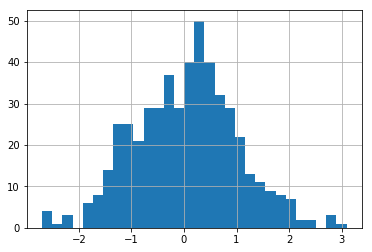

In [8]:
df1['A'].hist(bins=30)
# Note that it is using matplotlib under the hood

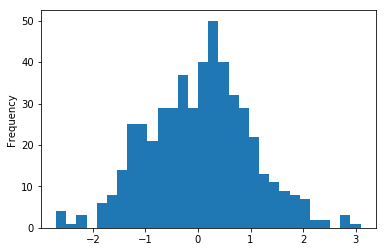

In [9]:
# we can also plot using kind
df1['A'].plot(kind='hist',bins=30)
# For whole dataset
#df1.plot(kind='hist',bins=30)

## Style Sheets

Matplotlib has [style sheets](http://matplotlib.org/gallery.html#style_sheets). We can use this to make our plots look a little nicer. These style sheets include `plot_bmh`,`plot_fivethirtyeight`,`plot_ggplot` and more. They basically create a set of style rules that our plots follow. Its good to use them because they make all our plots to have the same look and feel more professional. <br>
Let's call the style first!

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Now re-plot the same histogram plot!

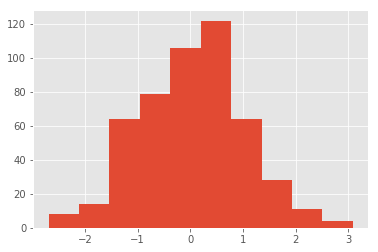

In [11]:
df1['A'].hist()

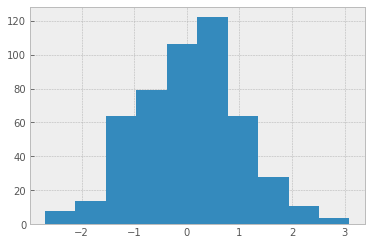

In [12]:
# Lets use another style "bhm"
plt.style.use('bmh')
df1['A'].hist()

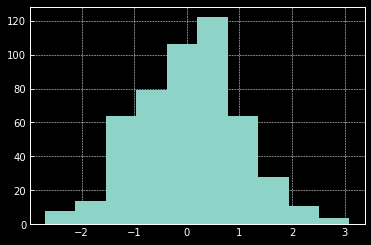

In [13]:
# we can use dark_background 
plt.style.use('dark_background')
df1['A'].hist()

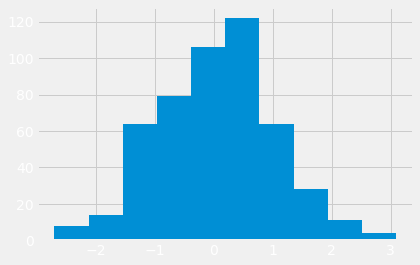

In [14]:
# another example
plt.style.use('fivethirtyeight')
df1['A'].hist()

In [15]:
plt.style.use('ggplot')

Let's stick with the `ggplot` style and explore how to utilize pandas built-in plotting capabilities!

# Plot Types

There are several plot types built-in to pandas, most of them are statistical plots by nature:

* `df.plot.area`     
* `df.plot.barh`     
* `df.plot.hist`     
* `df.plot.line`     
* `df.plot.scatter`
* `df.plot.bar`      
* `df.plot.box`      
* `df.plot.hexbin`   
* `df.plot.kde` 
* `df.plot.density` 
* `df.plot.pie`

We can also just call `df.plot(kind='hist')` or replace that kind argument with any of the key terms shown in the list above (e.g. `'box','barh'`, etc..)<br>
**Let's go through these plots one-by-one using our data frames `df1` and `df2`!**

### Area plot

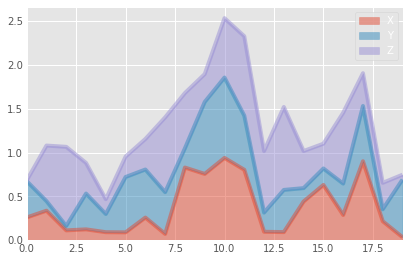

In [16]:
#df2.plot.area(alpha=0.5)
df2.plot(kind = 'area', alpha=0.5)

### Bar plots

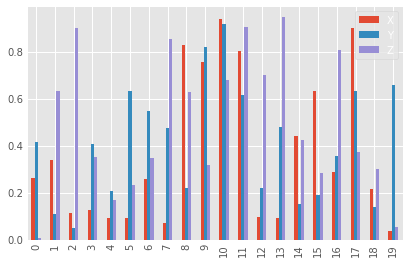

In [17]:
df2.plot.bar()

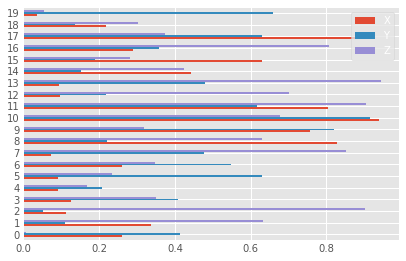

In [18]:
# Horizontal bars
df2.plot.barh()

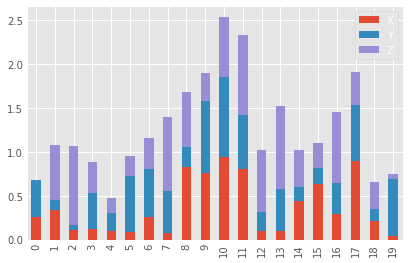

In [19]:
# we can stack them on top of each other 
df2.plot.bar(stacked=True)

### Histograms

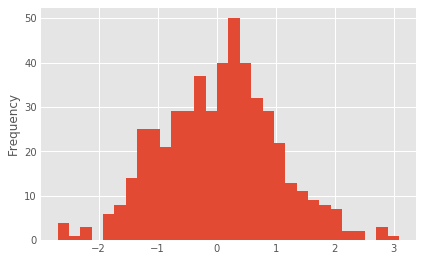

In [20]:
df1['A'].plot.hist(bins=30)

We can get all the columns on the same plot!

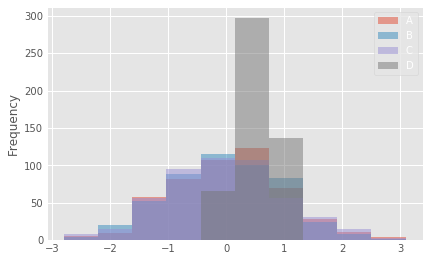

In [21]:
df1.plot.hist(alpha = 0.5)

A histogram can be stacked using `stacked=True`. This is not what we use often but it is good to know!

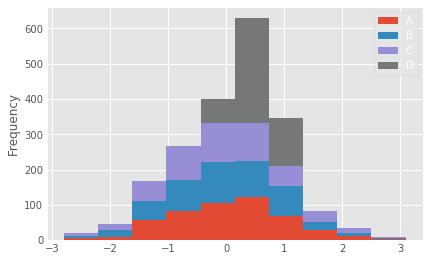

In [22]:
df1.plot.hist(stacked = True)

We can pass other keywords supported by `matplotlib hist`. For example, `horizontal` and `cumulative` histograms can be drawn by `orientation='horizontal`' and `cumulative=True`.<br>
Let's pass `orientation='horizontal`.

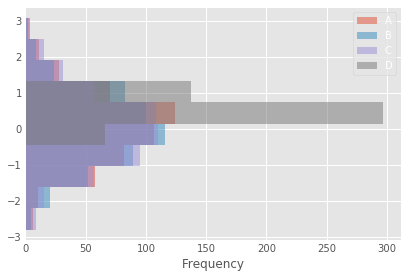

In [23]:
df1.plot.hist(orientation='horizontal',alpha = 0.5)

### Line plots

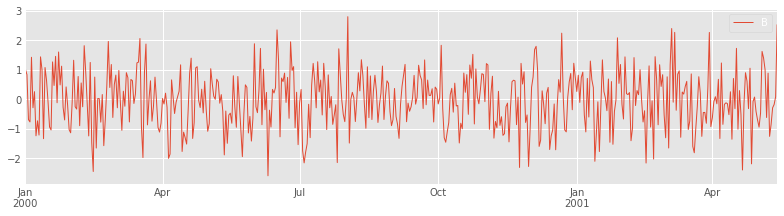

In [24]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

If the index consists of dates, it try to format the x-axis nicely as per above. <br>
calls matplotlib's  [`gcf().autofmt_xdate()`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.autofmt_xdate) for this purpose!

### Scatter plots
Scatter plot can be drawn by using the `DataFrame.plot.scatter()` method. Scatter plot requires numeric columns for the x and y axes. These can be specified by the x and y keywords.<br>
Let's try a scatter plot with df1 here!

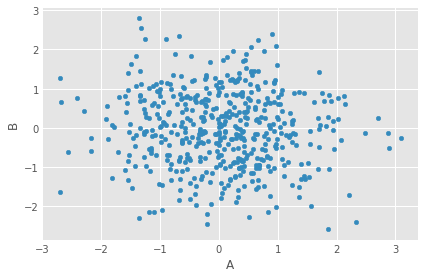

In [25]:
df1.plot.scatter(x='A',y='B')

To plot multiple column groups in a single axes, we need to repeat `plot` method specifying target ax. It is recommended to specify color and label keywords to distinguish each groups.

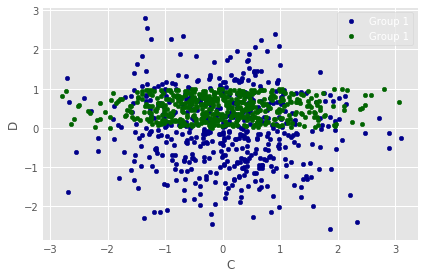

In [26]:
ax = df1.plot.scatter(x='A',y='B', 
                 color='DarkBlue', label='Group 1')
df1.plot.scatter(x='C',y='D', 
                 color='DarkGreen', label='Group 1', ax = ax)

The keyword `c` may be given as the name of a column to provide colors for each point. `cmap` can be used to indicate colormap. <br>
For all the colormaps, [click here](http://matplotlib.org/users/colormaps.html)

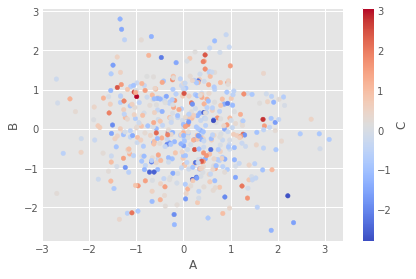

In [27]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

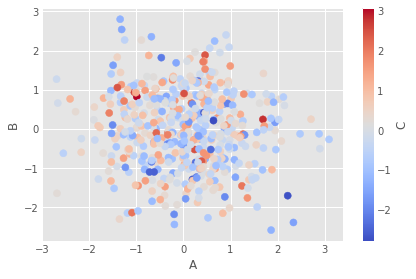

In [28]:
# We can use 's' to indicate size
df1.plot.scatter(x='A',y='B',c='C',s=50,cmap='coolwarm')

We can use **`s`** to indicate size of the bubble based on another column. <br>
**`s`** parameter needs to be an array, not just the name of a column:

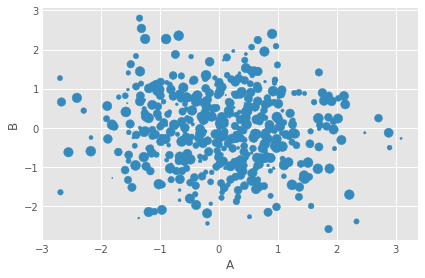

In [29]:
df1.plot.scatter(x='A',y='B',s=df1['D']*100)
# -ve value in sqrt could raise error

## BoxPlots
To visualize the distribution of values within each column.

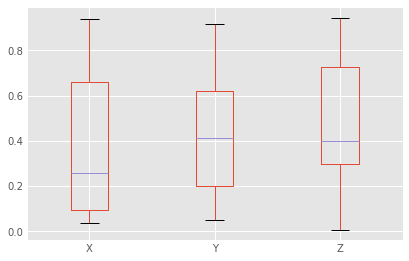

In [30]:
df2.plot.box() 

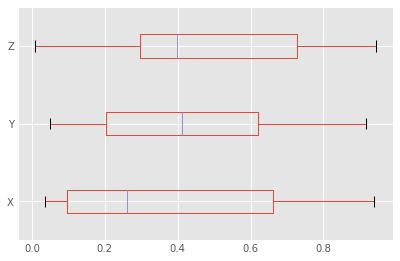

In [31]:
df2.plot.box(vert=False)

Boxplot can be colorized by passing color keyword. We can pass a dict whose keys are boxes, whiskers, medians and caps. If some keys are missing in the dict, default colors are used for the corresponding artists.

In [32]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')

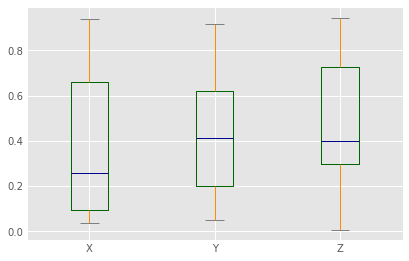

In [33]:
df2.plot.box(color=color)

We can also pass a **`by`** argument for groupby in the box plots.<br>
Let's add another column with A and B (two choices) in df2

In [34]:
df2['group'] = np.random.choice(['A', 'B'], size=20, )

In [35]:
df2.head()

,X,Y,Z,group
0,0.260171,0.414497,0.007417,A
1,0.337423,0.109517,0.632898,B
2,0.113148,0.050542,0.901551,B
3,0.124661,0.408012,0.349456,A
4,0.092462,0.207048,0.169073,A


`DataFrame.boxplot` to plot boxplot still can also be used.<br>
Let's grab `X` and `Y` columns and pass `by = 'g'`

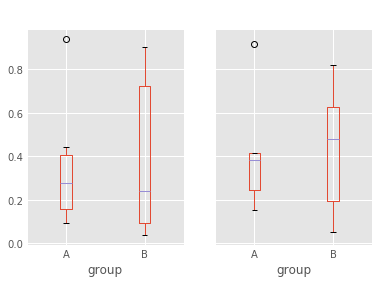

In [36]:
df2.boxplot(column =['X','Y'], by = 'group');

I am going to drop 'g' columns because I don't need this anymore!

In [37]:
df2.drop('group', axis=1, inplace=True)
df2.head()

,X,Y,Z
0,0.260171,0.414497,0.007417
1,0.337423,0.109517,0.632898
2,0.113148,0.050542,0.901551
3,0.124661,0.408012,0.349456
4,0.092462,0.207048,0.169073


## Hexagonal Bin Plot

Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

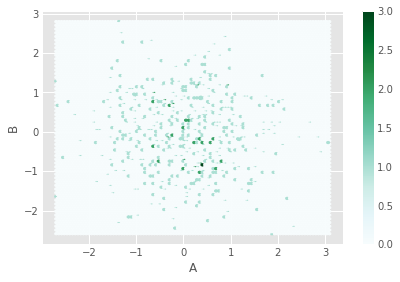

In [38]:
df1.plot.hexbin(x='A',y='B')#,gridsize=25,cmap='Oranges')

A useful keyword argument is `gridsize`; it controls the number of hexagons in the x-direction, and defaults to 100. A larger `gridsize` means more, smaller bins. Let's pass the `gridsize = 25` and see how the above plots look like!

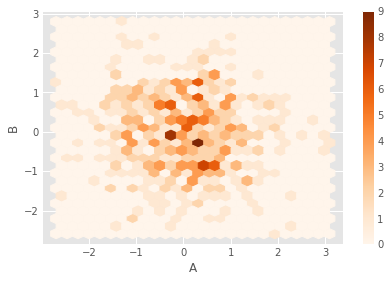

In [39]:
df1.plot.hexbin(x='A',y='B',gridsize=25,cmap='Oranges')

## Kernel Density Estimation plot (KDE)

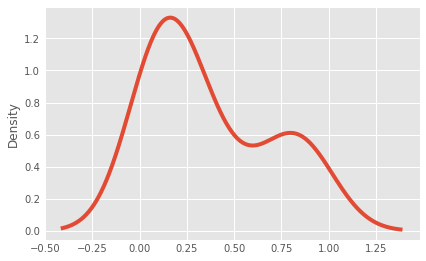

In [40]:
df2['X'].plot.kde()
#df2['X'].plot.density()

We can use `density()` as well!<br>
Let's try the complete dataframe df1 with density!

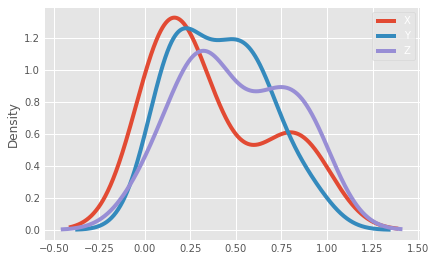

In [41]:
df2.plot.density()

## Pie Plot
We can create a pie plot with `DataFrame.plot.pie()` or `Series.plot.pie()`. If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.<br>
Let's try pie plot with df2.<br>

We need to specify a target column by the y argument. When y is specified, pie plot of selected column will be drawn.

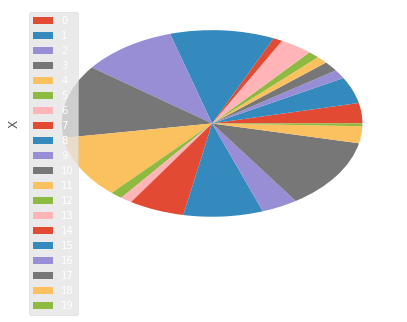

In [42]:
# let's take use X column only
df2.plot.pie(y='X')#,figsize=(12, 4),legend=False)

The plot above does not look nice, lets remove the legend and set the figure size!

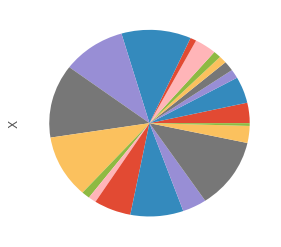

In [43]:
df2.plot.pie('X', figsize=(4, 4), legend=False)

Instead of passing y, we can pass-in `subplots=True`. This will generate pie plots for each column as subplots. A legend will be drawn in each pie plots by default; specify legend=False to hide it.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b433358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b4d9588>], dtype=object)

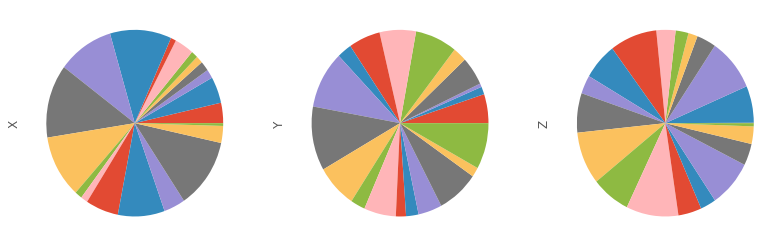

In [44]:
df2.plot.pie(subplots=True, figsize=(12, 4),legend=False)

This was all about the data visualization using pandas. You can see that how convenient it is to use pandas data visualization capabilities while EDA. It balances ease of use with control over the figure. A lot of the plot calls also accept additional arguments of their parent matplotlib library call. <br>

Let's move on to the exercises section now, where we will try to solve some tasks related to pandas data visualization. See you in the next lecture, Good Luck!

# Great Job!